In [2]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', font_scale=1.5)
plt.rc("axes.spines", top=False, right=False)
plt.rc('xtick', bottom=True)
plt.rc('ytick', left=True)
import joypy

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2436]:
    import pyranges as pr


    fname= "/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/gencode.v28.chr_patch_hapl_scaff.annotation.gtf.gz"
    gr = pr.read_gtf(fname)
    df = gr.df
    gene_data = df[df['Feature'] == 'gene']
    #gene_data['gene_id'] = [x.split('.')[0] for x in gene_data['gene_id']]
    #gene_data['gene_id'].drop_duplicates(inplace=True)
    

In [2486]:
exp_file = hm.hiCMatrix('/grid/gillis/data/lohia/hi_c_data_processing/software/CoCoCoNet/networks/human_prioAggNet_minimal.h5')


In [2526]:

exp_file_1 = hm.hiCMatrix('/grid/gillis/data/lohia/hi_c_data_processing/notebooks/terminal_scripts/genome_wide_drosophila_100kbp_raw_aggregate.h5')


In [2505]:

exp_file = hm.hiCMatrix('/grid/gillis/data/lohia/hi_c_data_processing/data_drosophila/aggregates/10kbp_raw/max/hic_gene_gw_none_none.h5')


In [ ]:
for top_species, species_color in zip(['human',],['#3CB7E8' ]):
#for top_species, species_color in zip(['human'],['#3CB7E8']):
    species_list = [top_species]
    #res_list = [1, 5, 10, 25, 40, 100,  250,  500]
    res_list = [10]
    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR']
    #performance_type_list = ['all']
    edge_type_list = ['contact']
    performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv', 'intra_only/hic_gene_KR_ranked_intra_1_percent_per_chr.csv', 'jac_sim/90/all_bins/KR_ranked_KR/intra_only/hic_gene_corr_intra_1_percent_per_chr.csv']
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    df_seq_depth = pd.concat(df_list)



    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in [top_species]: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for performance_type,edge_type  in zip(performance_type_list, edge_type_list):
                                #for edge_type in edge_type_list:

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = edge_type
                                        df2['contact_type'] = 'cis'
                                        empty_list.append(df2)
                                    except:
                                        continue
    df_whole_agg=pd.concat(empty_list)       
    df_whole_agg_1 = df_whole_agg.merge(df_seq_depth.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])


    species_list = [top_species]
    #res_list = [1, 5, 10, 25, 40, 100,  250,  500]

    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR']
    #performance_type_list = ['all']
    edge_type_list = ['contact']
    performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv', 'jac_sim/90/all_bins/KR_ranked_KR/inter_only/hic_gene_corr_inter_1_percent_per_chr.csv']
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    df_seq_depth = pd.concat(df_list)

    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in [top_species]: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for performance_type,edge_type  in zip(performance_type_list, edge_type_list):


                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = edge_type
                                        df2['contact_type'] = 'trans'
                                        empty_list.append(df2)
                                    except:
                                        continue
    df_whole_agg=pd.concat(empty_list)       
    df_whole_agg_2 = df_whole_agg.merge(df_seq_depth.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])




In [2580]:
cis_vs_trans = df_whole_agg_1[['gene_id_jac_sim', 'auc']].merge(df_whole_agg_2[['gene_id_jac_sim', 'auc']], left_on='gene_id_jac_sim', right_on='gene_id_jac_sim')


In [2581]:
cis_vs_trans['auc_xz'] = cis_vs_trans['auc_x'].round(2)
cis_vs_trans['auc_yz'] = cis_vs_trans['auc_y'].round(2)
#cis_vs_trans['auc_xz'] = cis_vs_trans['auc_xz'].astype('int')

<AxesSubplot:xlabel='auc_yz', ylabel='auc_xz'>

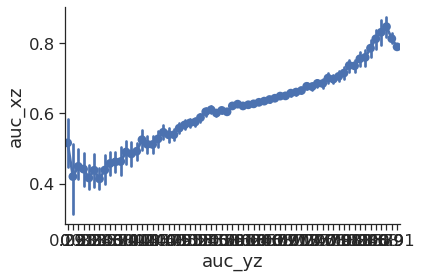

In [2583]:
sns.pointplot(data=cis_vs_trans, y='auc_xz', x='auc_yz')

  contact_type  rank edge_type       auc
0          cis     0     1/tss  0.515210
1          cis     1   contact  0.550752
2          cis     2       O/E  0.610954
3          cis     4      corr  0.637317
4        trans     1   contact  0.546344
5        trans     4      corr  0.526272


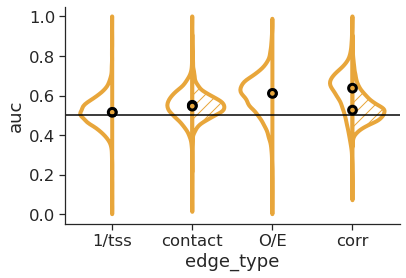

  contact_type  rank edge_type       auc
0          cis     0     1/tss  0.553135
1          cis     1   contact  0.646260
2          cis     2       O/E  0.638167
3          cis     4      corr  0.694374
4        trans     1   contact  0.642937
5        trans     4      corr  0.707513


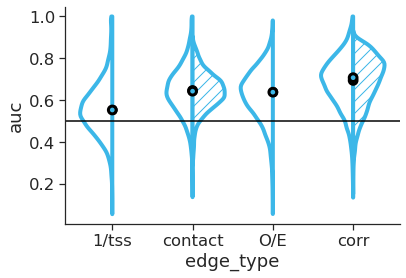

  contact_type  rank edge_type       auc
0          cis     0     1/tss  0.538822
1          cis     1   contact  0.626488
2          cis     2       O/E  0.640346
3          cis     4      corr  0.675407
4        trans     1   contact  0.616795
5        trans     4      corr  0.679050


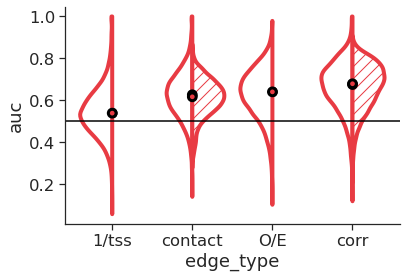

In [2306]:
for top_species, species_color in zip(['drosophila', 'human', 'mouse', ],['#E8A63B', '#3CB7E8', '#E83B43', ]):
#for top_species, species_color in zip(['human'],['#3CB7E8']):
    species_list = [top_species]
    #res_list = [1, 5, 10, 25, 40, 100,  250,  500]
    res_list = [10]
    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR']
    #performance_type_list = ['all']
    edge_type_list = ['contact', 'O/E','corr']
    performance_type_list = ['intra_only/hic_gene_none_intra_1_percent_per_chr.csv', 'intra_only/hic_gene_KR_ranked_intra_1_percent_per_chr.csv', 'jac_sim/90/all_bins/KR_ranked_KR/intra_only/hic_gene_corr_intra_1_percent_per_chr.csv']
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    df_seq_depth = pd.concat(df_list)

    df_list = []
    for species in species_list: 
        df = pd.read_csv(f'/grid/gillis/data/lohia/hi_c_data_processing/genomes_jlee/{species}_dist_intra_1_percent_per_chr.csv', sep='\t')
        df['species'] = species
        df['edge_type'] = '1/tss'
        df['contact_type'] = 'cis'
        df_list.append(df)
    df_tss= pd.concat(df_list)

    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in [top_species]: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for performance_type,edge_type  in zip(performance_type_list, edge_type_list):
                                #for edge_type in edge_type_list:

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = edge_type
                                        df2['contact_type'] = 'cis'
                                        empty_list.append(df2)
                                    except:
                                        continue
    df_whole_agg=pd.concat(empty_list)       
    df_whole_agg_1 = df_whole_agg.merge(df_seq_depth.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])


    species_list = [top_species]
    #res_list = [1, 5, 10, 25, 40, 100,  250,  500]

    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR']
    #performance_type_list = ['all']
    edge_type_list = ['contact', 'corr']
    performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv', 'jac_sim/90/all_bins/KR_ranked_KR/inter_only/hic_gene_corr_inter_1_percent_per_chr.csv']
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    df_seq_depth = pd.concat(df_list)

    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in [top_species]: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for performance_type,edge_type  in zip(performance_type_list, edge_type_list):


                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = edge_type
                                        df2['contact_type'] = 'trans'
                                        empty_list.append(df2)
                                    except:
                                        continue
    df_whole_agg=pd.concat(empty_list)       
    df_whole_agg_2 = df_whole_agg.merge(df_seq_depth.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])


    df_whole_agg = pd.concat([df_tss, df_whole_agg_1, df_whole_agg_2])
    df_whole_agg['rank'] = [0 if x=='1/tss' else 1 if x=='contact' else 2 if x=='O/E' else 4 for x in df_whole_agg['edge_type']]
    df_whole_agg.sort_values(['rank'], inplace=True)

    import matplotlib as mpl
    markers = {"cis": "o", "trans": "X"}
    sns.scatterplot(data=df_whole_agg.groupby(['contact_type','rank','edge_type'])['auc'].median().reset_index(), y='auc', hue='contact_type', x='edge_type',s=60, legend=False, color='white', markers=markers, edgecolor='black', linewidth=3)

    sc_bar = sns.violinplot(data=df_whole_agg,  x='edge_type',y='auc', hue='contact_type',split=True,  height=6, aspect=9/9.5, cut=0, palette=['white', 'white'], legend=False,dodge=True, inner=None, edge_color='black', linewidth=4)
    sc3 = sns.scatterplot(data=df_whole_agg.groupby(['contact_type','edge_type'])['auc'].median().reset_index(), y='auc', hue='contact_type', x='edge_type',s=60, legend=False, color='white', markers=markers, edgecolor='black', linewidth=3, palette=[species_color, species_color])

    pattern=['','', '//','', '','//']
    #violin_color = ['#D16E1D', '#81D31D', '#81D31D', '#1D81D3', '#6F1DD3','#6F1DD3']

    violin_colors=iter(violin_color)
    # replace 2 with 7 in your code
    hatches=iter(pattern)

    _ = [i.set_edgecolor(species_color) for i in sc3.get_children() if isinstance(i, mpl.collections.PolyCollection)]
    _ = [i.set_edgecolor(species_color) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]

    _ = [i.set_hatch(next(hatches)) for i in sc_bar.get_children() if isinstance(i, mpl.collections.PolyCollection)]
    sc_bar.legend().remove()
    sc_bar.axhline(0.5, color='black')
    print(df_whole_agg.groupby(['contact_type','rank','edge_type'])['auc'].median().reset_index())

    plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/species_edge_type_performance_{species}_{res_list[0]}.pdf',
                transparent=True)
    plt.show()

0.6520565147213006
resolution
1    0.655886
Name: auc, dtype: float64


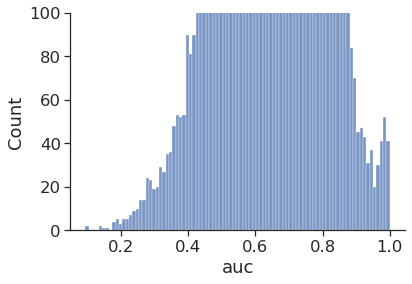

In [20]:
    #for species_list in [ ['human'], ['mouse'], ['drosophila']]:
    for species_list in [['human']]:
        intra_inter_type='intra'
        if species_list == ['human']:
            color_1 = 'darkgrey'
            color_2 = '#129BD1'
            max_val = 0.67
        elif species_list == ['mouse']:
            color_1 = 'darkgrey'
            color_2 = '#E83B43'
            max_val=0.65
        else:
            color_1 = 'darkgrey'
            color_2 = '#EC9200'
            max_val=0.58

        #res_list = [1, 5, 10, 25, 40, 100, 250, 500]
        res_list = [1]
        reversed_list = res_list[::-1]
        #res_list = [10]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
        df_whole_agg=pd.concat(empty_list)    
        print (df_whole_agg['auc'].mean())
        df_whole_agg['counts_intra'] = df_seq_depth['counts_intra'].sum()
        print (df_whole_agg.groupby(['resolution'])['auc'].median())
        ax = sns.histplot(data=df_whole_agg, x='auc')
        ax.set_ylim(0,100)
        plt.plot()

mean resolution
1    0.560525
Name: auc, dtype: float64
median resolution
1    0.534018
Name: auc, dtype: float64
0.5189352123886348 0.5016089083423703
0.5556414131393611 0.5299907895113325
0.5489492135895109 0.5128917658744867
0.5480644263732248 0.5147918400360572
0.5560214037158069 0.519114577852608
0.5548270529860931 0.5182206602477497
0.5509921913494011 0.5185759629796268
0.5473922743105765 0.5115340783242905
0.5505836938582803 0.5133846200620609
0.5535777222292153 0.5192952715551058
0.5208521464016056 0.499660767995763
0.5512354304690488 0.5125491435964111
0.5380959496526515 0.5071581633394554
0.5467687154097076 0.5112233608562885
0.5581312074999362 0.5207126922483518
0.5410942573954988 0.5059868443279806
0.52455264579228 0.5028253139359501
0.5436204892003991 0.50564899671884
0.527506402972712 0.501360399335629
0.5364928653294158 0.5032706014536006


<ipython-input-42-0e88bcf6ca70>:143: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


0.554375566454369 0.5213263866482791
0.550694320681758 0.510678645340068
0.552217025351095 0.5178885147453094
0.5451311957357518 0.5109374527631172
0.5452874163077603 0.5097028967375586
0.5257727812155987 0.5032660470475359
0.5181264604883314 0.4992457487657707
0.5364335650148239 0.5015348093782706
0.5206537998032696 0.5006815947473755


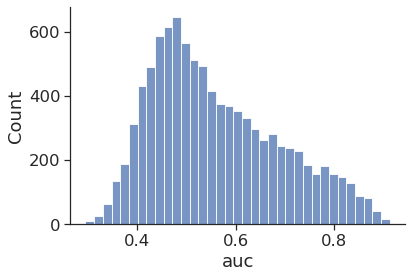

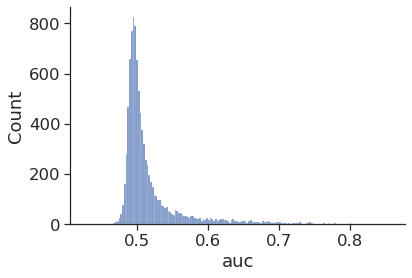

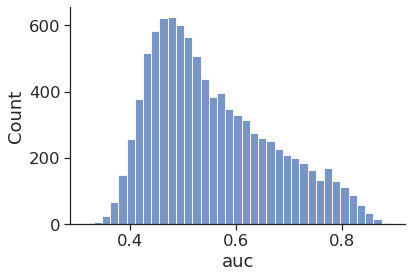

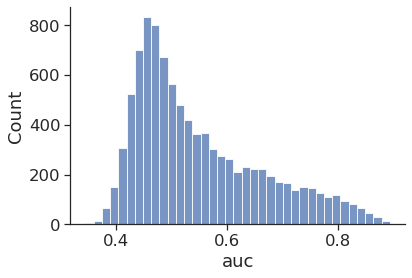

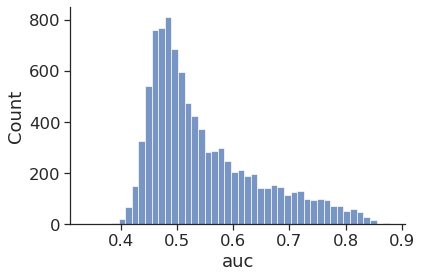

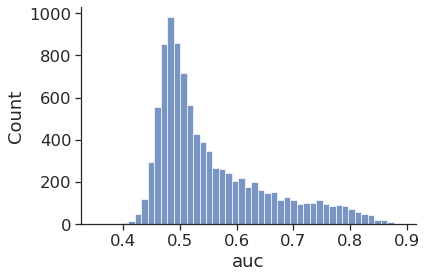

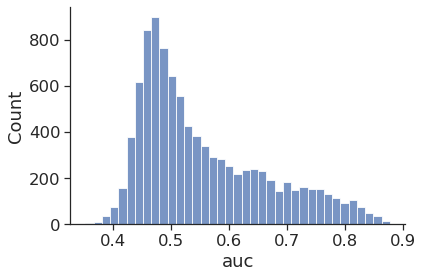

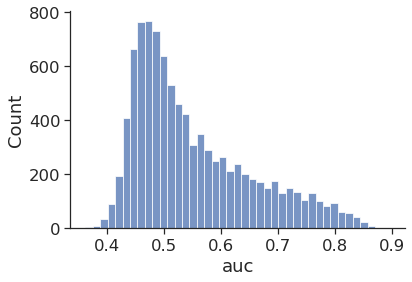

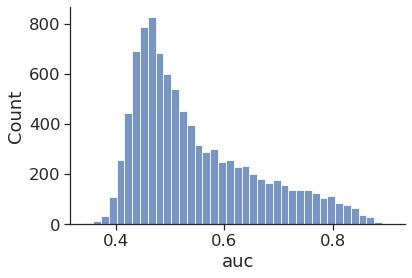

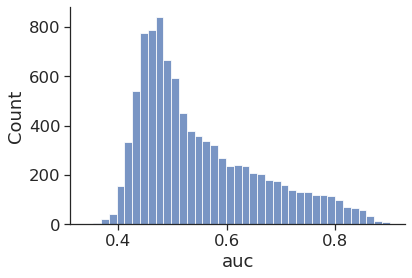

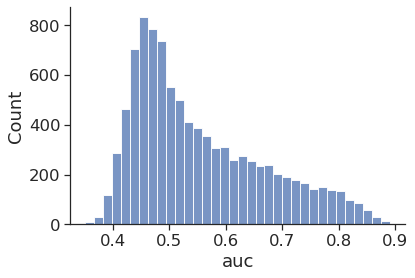

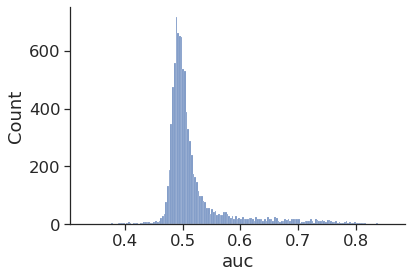

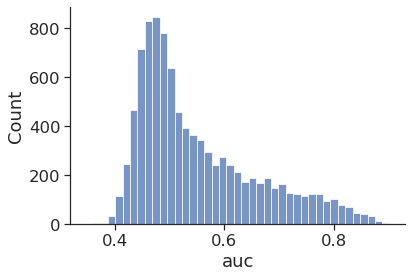

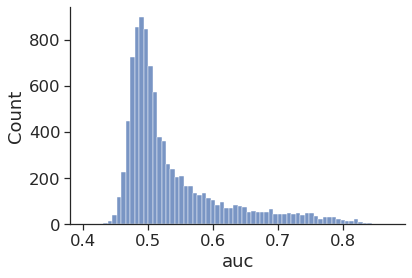

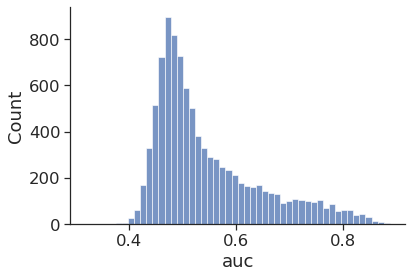

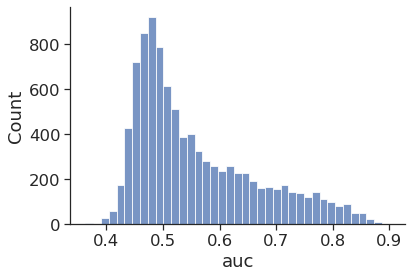

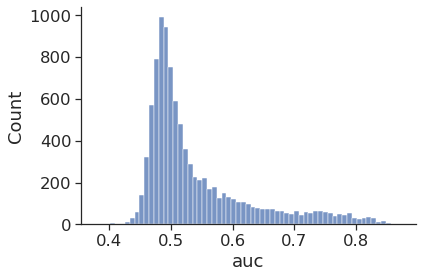

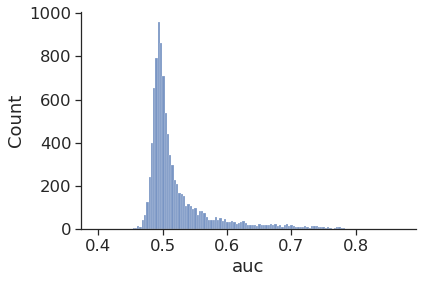

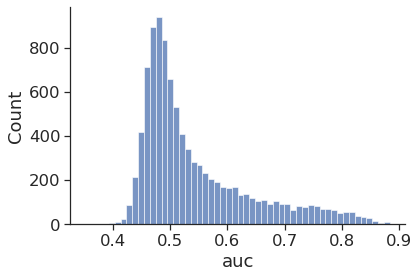

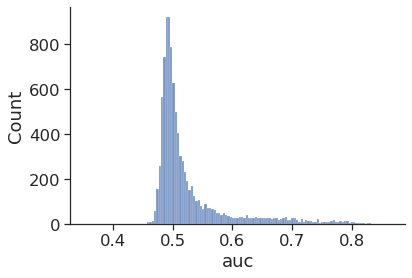

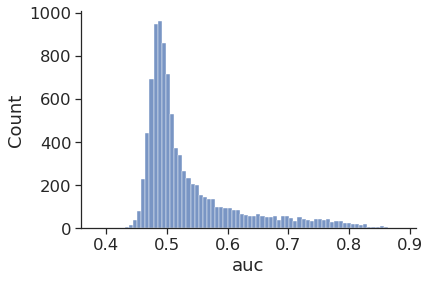

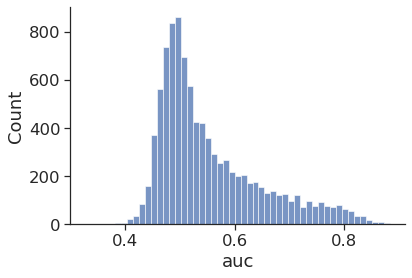

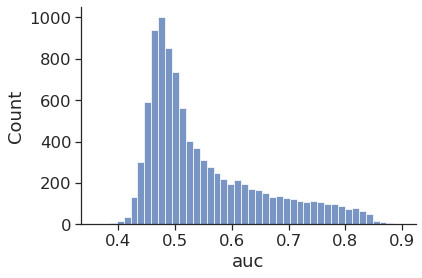

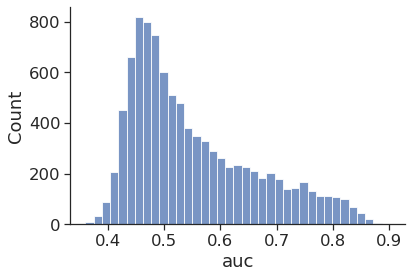

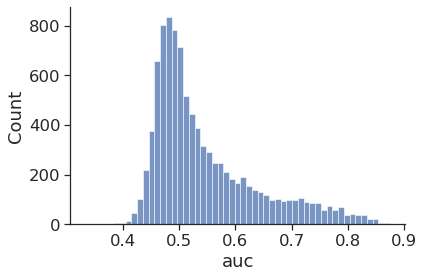

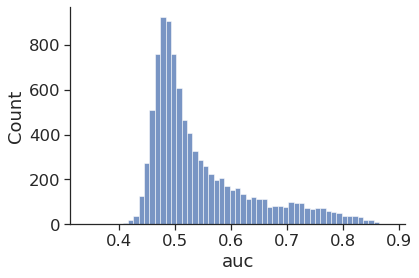

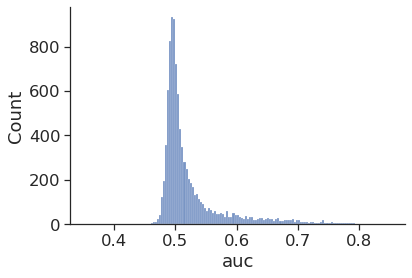

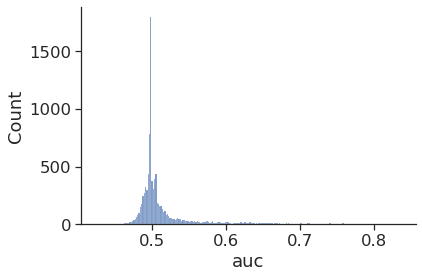

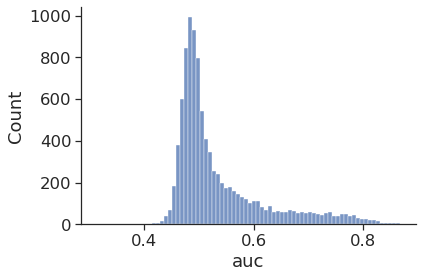

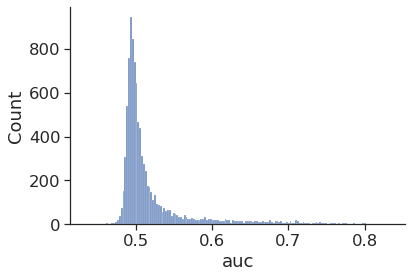

In [42]:
    #for species_list in [ ['human'], ['mouse'], ['drosophila']]:
    for species_list in [['drosophila']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'darkgrey'
            color_2 = '#129BD1'
            max_val = 0.67
        elif species_list == ['mouse']:
            color_1 = 'darkgrey'
            color_2 = '#E83B43'
            max_val=0.65
        else:
            color_1 = 'darkgrey'
            color_2 = '#EC9200'
            max_val=0.58

        #res_list = [1, 5, 10, 25, 40, 100, 250, 500]
        res_list = [1]
        reversed_list = res_list[::-1]
        #res_list = [10]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
        df_whole_agg=pd.concat(empty_list)    
        #print (df_whole_agg['auc'].mean())
        df_whole_agg['counts_intra'] = df_seq_depth['counts_intra'].sum()
        print ('mean' , df_whole_agg.groupby(['resolution'])['auc'].mean())
        print ('median', df_whole_agg.groupby(['resolution'])['auc'].median())
        ax = sns.histplot(data=df_whole_agg, x='auc')
        #ax.set_ylim(0,100)
        plt.plot()
        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    #performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_intra'] = df_seq_depth_subset['counts_intra'].sum()
                                            #print (df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index())
                                            #df2 = df2.merge(df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])
                                            #print (jkkk)
                                            fig, ax = plt.subplots()
                                            ax = sns.histplot(data=df2, x='auc')
                                            plt.plot()
                                            print (df2['auc'].mean(), df2['auc'].median())
                                            #plt.close()

                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue
        

0.6118142493180067
resolution
1      0.652057
5      0.640332
10     0.630431
25     0.624281
40     0.617720
100    0.598775
250    0.576014
500    0.554904
Name: auc, dtype: float64


<ipython-input-116-cf7c800d7a07>:158: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()
<ipython-input-116-cf7c800d7a07>:170: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])


None
0.6621938032657481
0.5998656255352733
resolution
1      0.624540
5      0.629725
10     0.625210
25     0.614927
40     0.607908
100    0.588418
250    0.566258
500    0.541939
Name: auc, dtype: float64


<ipython-input-116-cf7c800d7a07>:158: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()
<ipython-input-116-cf7c800d7a07>:170: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])


None
0.63707280823297
0.5329424887992281
resolution
1      0.573740
5      0.559895
10     0.550243
25     0.535030
40     0.527284
100    0.513797
250    0.504205
500    0.499346
Name: auc, dtype: float64


<ipython-input-116-cf7c800d7a07>:158: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()
<ipython-input-116-cf7c800d7a07>:170: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])


None
0.5880180568412794


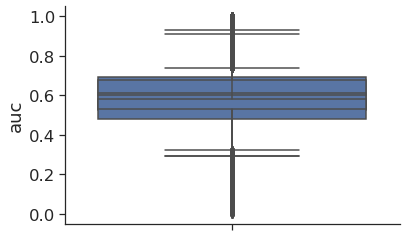

In [116]:
    #for species_list in [ ['human'], ['mouse'], ['drosophila']]:
    for species_list in [['drosophila']]:
        intra_inter_type='intra'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val = 0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200'
            max_val=0.59

        res_list = [1, 5, 10, 25, 40, 100, 250, 500]
        #res_list = [1, 5, 10]
        #res_list = [1]
        reversed_list = res_list[::-1]
        #res_list = [10]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']
        #performance_type_list = ['pcc/0/all_bins/KR_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
        df_whole_agg=pd.concat(empty_list)    
        print (df_whole_agg['auc'].mean())
        df_whole_agg['counts_intra'] = df_seq_depth['counts_intra'].sum()
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())
        sns.boxplot(data=df_whole_agg, y='auc')
        plt.plot()


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    #performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_intra'] = df_seq_depth_subset['counts_intra'].sum()
                                            #print (df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index())
                                            #df2 = df2.merge(df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])
                                            #print (jkkk)
                                            #print (df2)

                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_intra']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_intra']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_cis.tsv'))
        #plt.plot()
        
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==1], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        sc_bar.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        sc_bar.set(ylim=(0.48, max_val))
        print (dk['auc'].max())
        plt.plot()
        plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
                transparent=True, bbox_inches='tight')
        plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5, order=reversed_list)
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        ax.set(ylim=(0.48, max_val))
        plt.plot()

        plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
                transparent=True, bbox_inches='tight')
        plt.close()


In [109]:
df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')

In [110]:
df_seq_depth

proj_id      srx_id       run_id  counts_intra  chrom
0      SRP105082  SRX4063543   SRR7143261         35859   chr1
1      SRP105082  SRX4063543   SRR7143261         37134   chr2
2      SRP105082  SRX4063543   SRR7143261         29405   chr3
3      SRP105082  SRX4063543   SRR7143261         25793   chr4
4      SRP105082  SRX4063543   SRR7143261         25135   chr5
...          ...         ...          ...           ...    ...
79285  SRP071243  SRX8330501  SRR11777634       3375204  chr18
79286  SRP071243  SRX8330501  SRR11777634       2377432  chr19
79287  SRP071243  SRX8330501  SRR11777634       2751171  chr20
79288  SRP071243  SRX8330501  SRR11777634       1377300  chr21
79289  SRP071243  SRX8330501  SRR11777634       1339707  chr22

[79290 rows x 5 columns]

0.668363201911589
resolution
40     0.706990
100    0.675335
500    0.619058
Name: auc, dtype: float64


<ipython-input-279-7ecda62c2c0e>:149: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].median().reset_index()


None
0.7069904506117577


<ipython-input-279-7ecda62c2c0e>:162: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].median().reset_index()])


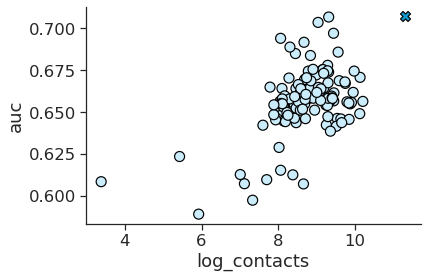

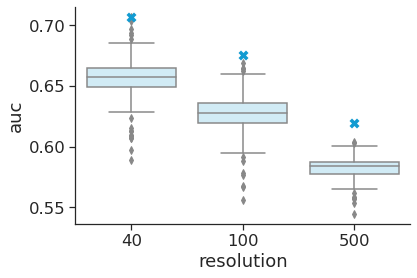

In [279]:
    #for species_list in [ ['human'], ['mouse'], ['drosophila']]:
    for species_list in [['human']]:
        intra_inter_type='intra'
        if species_list == ['human']:
            color_1 = '#CBEDFB'
            color_2 = '#129BD1'
        elif species_list == ['mouse']:
            color_1 = '#F69398'
            color_2 = '#E83B43'
        else:
            color_1 = '#E9DBC4'
            color_2 = '#EC9200'        

        res_list = [40,  100, 500]
        #res_list = [10]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        #performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']
        performance_type_list = ['intra_only/hic_gene_corr_intra_ind_1_percent_per_chr.csv']
        

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max/jac_sim/90/all_bins/KR_ranked_KR']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
        df_whole_agg=pd.concat(empty_list)    
        print (df_whole_agg['auc'].median())
        df_whole_agg['counts_intra'] = df_seq_depth['counts_intra'].sum()
        print (df_whole_agg.groupby(['resolution'])['auc'].median())


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max/jac_sim/90/all_bins/KR_ranked_KR']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    #performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/{mapping}/intra_only/hic_gene_corr_intra_1_percent_per_chr.csv'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_intra'] = df_seq_depth_subset['counts_intra'].sum()
                                            #print (df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index())
                                            #df2 = df2.merge(df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])
                                            #print (jkkk)

                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].median().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_intra']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].median().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_intra']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_cis.tsv'))
        plt.plot()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==40], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="black", s=100, linewidth=1.2, markers =  {"proj_agg": "o", "meta": "X"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        print (dk['auc'].max())
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True)
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='black', linewidth=0,marker='X')
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        plt.plot()

        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


0.6336192515051372
resolution
1       0.652057
200     0.628800
600     0.629500
1000    0.629420
2000    0.628463
3000    0.615355
5000    0.601424
Name: auc, dtype: float64
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 17)
(23465, 1

<ipython-input-126-bd60a3732f71>:167: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()
<ipython-input-126-bd60a3732f71>:180: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])


done min


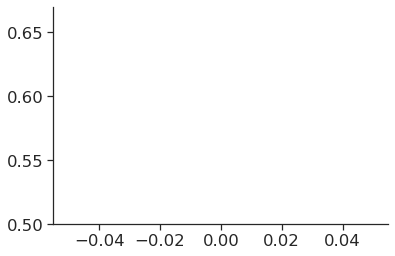

In [126]:
    species_list = ['human']
    if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
    elif species_list == ['mouse']:
            color_1 = '#F69398'
            color_2 = '#E83B43'
            max_val=0.65
    else:
            color_1 = '#E9DBC4'
            color_2 = '#EC9200'       
    
    res_list = [1]
    #res_list = [10]
    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR_ranked']
    #performance_type_list = ['all']
    edge_type_list = ['contact']
    dist_list = [1000, 200000, 600000, 1000000, 2000000, 3000000, 5000000]
    #dist_list = [1000, 2000000]
    performance_type_list = []
    
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_none_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in ['human']: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for new_res in dist_list:
                                #performance_type = 'intra_only/hic_gene_none_intra_1_percent_per_chr.csv'

                                file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'
                                
                                if new_res == 1000:
                                    file_name = f'{resolution}kbp_raw/{mapping}//intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'
                                    
                                    
                                else:

                                    file_name = f'{resolution}kbp_raw/{mapping}//intra_only/hic_gene_KR_intra_1_percent_per_chr_{new_res}.csv'
                                new_res = int(new_res / 1000)

                                try:


                                    df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                    df2['species'] = species
                                    df2['resolution'] = new_res
                                    df2['mapping'] = mapping
                                    df2['coef'] = coef
                                    df2['bin_type'] = bin_type
                                    df2['percentile'] = percentile
                                    df2['KR_type'] = KR_type
                                    df2['pairs'] = performance_type
                                    df2['coexp_percentile'] = gene_percentile
                                    df2['agg_type'] = 'meta'
                                    df2['proj'] = 'all'
                                    df2['edge_type'] = ''
                                    #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                    empty_list.append(df2)
                                except:
                                    print (new_res)
                                    continue
    df_whole_agg=pd.concat(empty_list)    
    print (df_whole_agg['auc'].mean())
    df_whole_agg = df_whole_agg.merge(df_seq_depth.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])
    print (df_whole_agg.groupby(['resolution'])['auc'].mean())


    for species in species_list: 
        contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []
        counter = 0

        for proj in df_con['id'].tolist():
              counter = counter +1


              #for species in ['drosophila', 'drosophila', 'drosophila']: 

              #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
              for bin_type in ['all_bins']: 
                for resolution in res_list:
                    for coef in ['jac_sim']:
                    #for coef in ['pcc', 'jac_sim']:
                      #for mapping in ['tss']:
                      for mapping in ['max']:
                        for percentile in ['90']:
                            for KR_type in KR_type_list:
                                for new_res in  dist_list:
                                #for performance_type in ['intra_only', 'inter_only', 'all']:
                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                    if new_res == 1000:
                                        file_name = f'{resolution}kbp_raw/{mapping}//intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'
                                    
                                    
                                    else:

                                        file_name = f'{resolution}kbp_raw/{mapping}//intra_only/hic_gene_KR_intra_1_percent_per_chr_{new_res}.csv'
                                    new_res = int(new_res / 1000)
                                    #file_name = f'{resolution}kbp_raw/{mapping}/intra_only/hic_gene_none_intra_1_percent_per_chr_{new_res}.csv'


                                    #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = new_res
                                        #df2['inp_file'] = inp_file
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['proj'] = proj
                                        df2['pairs'] = performance_type
                                        df2['agg_type'] = 'proj_agg'
                                        #print (df2['auc'].dropna().shape, new_res, proj)
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        #print (proj)
                                        df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                        df2 = df2.merge(df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])
                                        print (df2.shape)


                                    except:
                                        print (proj, resolution, counter, proj, f'{file_path}/{file_name}')
                                        continue


                                    empty_list.append(df2)
                                    #print (df2.shape)
                                
    df_ind=pd.concat(empty_list)

    df = pd.concat([df_whole_agg, df_ind])

    dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()

    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
        df_seq_depth['species'] = species
        df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
        df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

    import numpy as np
    dt['log_contacts'] = [np.log10(x) for x in dt['counts_intra']]

    dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
    dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])
    dk['log_contacts'] = [np.log10(x) for x in dk['counts_intra']]

    dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

    sc_bar = sns.scatterplot(data=dk[dk['resolution']==800], x='log_contacts', y='auc', style='agg_type', color=color_1,edgecolor="black", s=100, linewidth=1.2, markers =  {"proj_agg": "*", "meta": "o"})
    sc_bar.legend().remove()
    sc_bar.set(ylim=(0.5, 0.67))
    plt.plot()
    #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_minimum_dist.pdf',
    #        transparent=True)
    #plt.close()
    print ("done min")
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5)
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
    sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=1,marker='o')
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
    #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
    ax.set(ylim=(0.48, 0.67))
    #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)
    #axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v")
    #for i, patch in enumerate(axb.artists):
        # Boxes from left to right

    #    patch.set_hatch('//')
    #sns.pointplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, markers='^', scale = 1.5)
    #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, orient="v")
    #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
    #ax.set(ylim=(0.5, 0.67))
    plt.plot()
    
    plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_minimum_dist.pdf',
            transparent=True)
    plt.close()


In [70]:
len(empty_list)

238

In [63]:
dt

proj  resolution  agg_type       auc  counts_intra  log_contacts  \
0    DRP005173           1  proj_agg  0.590479  9.873406e+06      6.994467   
1    DRP005173         200  proj_agg  0.556888  9.873406e+06      6.994467   
2    DRP005173         400  proj_agg  0.552905  9.873406e+06      6.994467   
3    DRP005173         600  proj_agg  0.550005  9.873406e+06      6.994467   
4    DRP005173         800  proj_agg  0.547488  9.873406e+06      6.994467   
..         ...         ...       ...       ...           ...           ...   
709  SRP274139         200  proj_agg  0.567141  2.243028e+07      7.350835   
710  SRP274139         400  proj_agg  0.562651  2.243028e+07      7.350835   
711  SRP274139         600  proj_agg  0.558696  2.243028e+07      7.350835   
712  SRP274139         800  proj_agg  0.554498  2.243028e+07      7.350835   
713  SRP274139        1000  proj_agg  0.553352  2.243028e+07      7.350835   

       project  runs                                 experiment type  \
0    DRP005173     9  "inexpensive and controllable Hi-C (iconHi-C)"   
1    DRP005173     9  "inexpensive and controllable Hi-C (iconHi-C)"   
2    DRP005173     9  "inexpensive and controllable Hi-C (iconHi-C)"   
3    DRP005173     9  "inexpensive and controllable Hi-C (iconHi-C)"   
4    DRP005173     9  "inexpensive and controllable Hi-C (iconHi-C)"   
..         ...   ...                                             ...   
709  SRP274139     3                                            Hi-C   
710  SRP274139     3                                            Hi-C   
711  SRP274139     3                                            Hi-C   
712  SRP274139     3                                            Hi-C   
713  SRP274139     3                                            Hi-C   

                                   experiment type2  \
0    "inexpensive and controllable Hi-C (iconHi-C)"   
1    "inexpensive and controllable Hi-C (iconHi-C)"   
2    "inexpensive and controllable Hi-C (iconHi-C)"   
3    "inexpensive and controllable Hi-C (iconHi-C)"   
4    "inexpensive and controllable Hi-C (iconHi-C)"   
..                                              ...   
709                                            Hi-C   
710                                            Hi-C   
711                                            Hi-C   
712                                            Hi-C   
713                                            Hi-C   

                                              SRA link  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
709  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
710  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
711  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
712  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
713  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   

                                           Paper title  \
0    Multifaceted Hi-C benchmarking for chromosome-...   
1    Multifaceted Hi-C benchmarking for chromosome-...   
2    Multifaceted Hi-C benchmarking for chromosome-...   
3    Multifaceted Hi-C benchmarking for chromosome-...   
4    Multifaceted Hi-C benchmarking for chromosome-...   
..                                                 ...   
709  STAG2 loss-of-function affects short-range gen...   
710  STAG2 loss-of-function affects short-range gen...   
711  STAG2 loss-of-function affects short-range gen...   
712  STAG2 loss-of-function affects short-range gen...   
713  STAG2 loss-of-function affects short-range gen...   

                                            Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0    This study provides the first comparison of mu...        NaN        

In [219]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['drosophila']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        res_list = [10, 25, 40, 100, 250, 500]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['inter_only/hic_gene_none_inter_1_percent_per_chr.csv']:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        #fig, ax = plt.subplots()
        #plt.plot()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        plt.plot()
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()

        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        plt.close()


resolution
10     0.551054
25     0.538389
40     0.531897
100    0.519318
250    0.510328
500    0.507202
Name: auc, dtype: float64


<ipython-input-219-76fbcd395eaf>:150: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()


None


<ipython-input-219-76fbcd395eaf>:163: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


In [2562]:
for species in ['drosophila', 'human', 'mouse', 'drosophila']:
    for resolution in [1]:
     df_cis = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_cis.tsv')
     df_trans = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_1_auc_trans.tsv')
     df_cis['auc_cis'] =  df_cis['auc']
     #df_cis['auc_cis'] =  df_cis['auc'] 
     #print (df_cis)
     #print (df_trans)
     df_cis.drop(columns=['auc','log_contacts', 'Unnamed: 0'], axis=0, inplace=True)
     
     df_trans['auc_trans'] =  df_trans['auc']
     df_trans.drop(columns=['auc','log_contacts', 'Unnamed: 0', 'resolution'], axis=0, inplace=True)
     df_cis.merge(df_trans)[['project', 'runs', 'counts_intra', 'counts_inter', 'auc_cis', 'auc_trans']].to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_1_1_auc_cis_trans.tsv', index=False)
    

    

FileNotFoundError: [Errno 2] No such file or directory: '/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/stats/human_project_network_details_1_auc_trans.tsv'

resolution  agg_type
10          spearman    0.674487
40          spearman    0.634463
100         spearman    0.625350
500         spearman    0.608516
Name: auc, dtype: float64


<ipython-input-227-f0a791cd07c0>:145: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-227-f0a791cd07c0>:158: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


[]

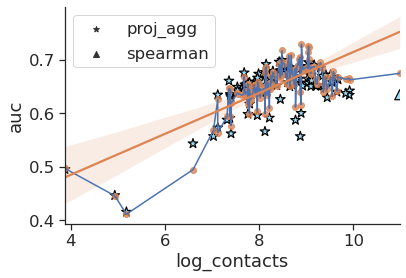

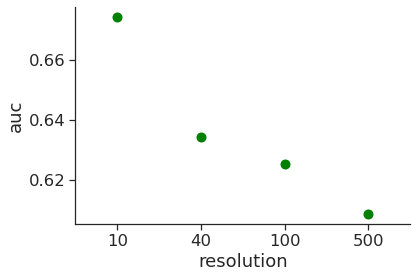

In [227]:
    species_list = ['human']
    if species_list == ['human']:
        color_1 = '#98DBF6'
        color_2 = '#00A5E6'
    elif species_list == ['mouse']:
        color_1 = '#F69398'
        color_2 = '#E83B43'
    else:
        color_1 = '#E9DBC4'
        color_2 = '#EC9200'        
    
    res_list = [10, 40, 100, 500]
    #res_list = [10]
    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR']
    #performance_type_list = ['all']
    edge_type_list = ['contact']
    #performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv']
    performance_type_list = ['inter_only/hic_gene_corr_inter_excluding_intra_nanranked_1_percent_per_chr.csv']
    
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in ['human']: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for performance_type, agg_type in zip(['/spr/0/all_bins/KR_KR/inter_only/hic_gene_corr_inter_excluding_intra_nanranked_1_percent_per_chr.csv', '/spr/0/all_bins/KR_KR/inter_only/hic_gene_corr_inter_excluding_intra_nanranked_ind_1_percent_per_chr.csv'], ['spearman']):

                                file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                try:


                                    df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                    df2['species'] = species
                                    df2['resolution'] = resolution
                                    df2['mapping'] = mapping
                                    df2['coef'] = coef
                                    df2['bin_type'] = bin_type
                                    df2['percentile'] = percentile
                                    df2['KR_type'] = KR_type
                                    df2['pairs'] = performance_type
                                    df2['coexp_percentile'] = gene_percentile
                                    df2['agg_type'] = agg_type
                                    df2['proj'] = 'all'
                                    df2['edge_type'] = ''
                                    empty_list.append(df2)
                                except:
                                    continue
    df_whole_agg=pd.concat(empty_list)       
    df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
    print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())
    
    
    counter = 0
    performance_type_list = ['inter_only/hic_gene_corr_inter_excluding_intra_nanranked_1_percent_per_chr.csv']
    for species in species_list: 
        contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
        df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

        import pandas as pd
        empty_list = []

        for proj in df_con['id'].tolist() :
              counter = counter + 1
              

              #for species in ['drosophila', 'drosophila', 'drosophila']: 

              #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
              for bin_type in ['all_bins']: 
                for resolution in res_list:
                    for coef in ['jac_sim']:
                    #for coef in ['pcc', 'jac_sim']:
                      #for mapping in ['tss']:
                      for mapping in ['max/spr/0/all_bins/KR_KR']:
                        #print (proj)
                        for percentile in ['90']:
                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                #for performance_type in ['intra_only', 'inter_only', 'all']:
                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                    file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'


                                    #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                    try:

                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        #df2['inp_file'] = inp_file
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['proj'] = proj
                                        df2['pairs'] = performance_type
                                        df2['agg_type'] = 'proj_agg'
                                        #print (proj)
                                        
                                        df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                        df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                    except:
                                        #print (f'{file_path}/{file_name}')
                                        print (counter, proj, resolution)
                                        
                                        continue


                                    empty_list.append(df2)
    df_ind=pd.concat(empty_list)

    df = pd.concat([df_whole_agg, df_ind])

    dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
        df_seq_depth['species'] = species
        df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
        df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
        #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

    import numpy as np
    dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

    dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
    dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
    dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

    dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
    
    #dk = dk[dk['auc'] > 0.5]
    #dk = dk[dk['agg_type']=='proj_agg']
    #print (dk)
    
    
    
    

    sc_bar = sns.scatterplot(data=dk[dk['resolution']==40], x='log_contacts', y='auc', style='agg_type', color=color_1,edgecolor="black", s=100, linewidth=1.2, markers =  {"proj_agg": "*", "pearson": "o", "spearman": "^"})
    sc_bar.legend().remove()
    #sc_bar = sns.scatterplot(data=dk[dk['resolution']==100], x='log_contacts', y='auc')
    #dk['log_contacts'] = dk['log_contacts'].round(0)
    sc_bar = sns.lineplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc')
    
    sc_bar = sns.regplot(data=dk[dk['resolution']==10], x='log_contacts', y='auc')
    #sc_bar.set(ylim=(0.5, 0.67))
    plt.plot()
    #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_inter.pdf',
    #        transparent=True)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)
    #axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v")
    #for i, patch in enumerate(axb.artists):
        # Boxes from left to right

     #   patch.set_hatch('//')
    #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='pearson'], ax=ax, size=10, color=color_2, orient="v")
    sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='spearman'], ax=ax, size=10, color="green", orient="v")
    #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
    #ax.set(ylim=(0.5, 0.67))
    plt.plot()
    
    #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_inter.pdf',
    #        transparent=True)


In [223]:
    species_list = ['human']
    if species_list == ['human']:
        color_1 = '#98DBF6'
        color_2 = '#00A5E6'
    elif species_list == ['mouse']:
        color_1 = '#F69398'
        color_2 = '#E83B43'
    else:
        color_1 = '#E9DBC4'
        color_2 = '#EC9200'        
    
    res_list = [10, 40, 500]
    #res_list = [10]
    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR']
    #performance_type_list = ['all']
    edge_type_list = ['contact']
    #performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv']
    performance_type_list = ['inter_only/hic_gene_corr_inter_excluding_intra_nanranked_ind_1_percent_per_chr.csv']
    
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in ['human']: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for performance_type, agg_type in zip(['/spr/0/all_bins/KR_KR/inter_only/hic_gene_corr_inter_excluding_intra_nanranked_ind_1_percent_per_chr.csv', '/spr/0/all_bins/KR_KR/inter_only/hic_gene_corr_inter_excluding_intra_nanranked_1_percent_per_chr.csv'], ['meta']):

                                file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                try:


                                    df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                    df2['species'] = species
                                    df2['resolution'] = resolution
                                    df2['mapping'] = mapping
                                    df2['coef'] = coef
                                    df2['bin_type'] = bin_type
                                    df2['percentile'] = percentile
                                    df2['KR_type'] = KR_type
                                    df2['pairs'] = performance_type
                                    df2['coexp_percentile'] = gene_percentile
                                    df2['agg_type'] = agg_type
                                    print (agg_type)
                                    df2['proj'] = 'all'
                                    df2['edge_type'] = ''
                                    empty_list.append(df2)
                                except:
                                    continue
    df_whole_agg=pd.concat(empty_list)       
    df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
    print (df_whole_agg.groupby(['resolution', 'agg_type'])['auc'].mean())
    

meta
resolution  agg_type
10          meta        0.697335
Name: auc, dtype: float64


In [95]:
df_whole_agg[(df_whole_agg['resolution'] == 500)][['gene_id_jac_sim','auc']].sort_values(by=['auc']).tail()

gene_id_jac_sim       auc
21038  ENSG00000070388  0.893911
13790  ENSG00000150275  0.895255
20298  ENSG00000141933  0.895436
11134  ENSG00000182050  0.895683
17663  ENSG00000141933  0.905151

In [96]:
df_whole_agg[(df_whole_agg['gene_id_jac_sim'] == 'ENSG00000163093')] 

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file  \
3459   ENSG00000163093          chr2  ENSG00000163093           chr2   
14549  ENSG00000163093          chr2  ENSG00000163093           chr2   
17980  ENSG00000163093          chr2  ENSG00000163093           chr2   
6667   ENSG00000163093          chr2  ENSG00000163093           chr2   
9630   ENSG00000163093          chr2  ENSG00000163093           chr2   
20213  ENSG00000163093          chr2  ENSG00000163093           chr2   
17417  ENSG00000163093          chr2  ENSG00000163093           chr2   
8317   ENSG00000163093          chr2  ENSG00000163093           chr2   

            auc species  resolution                   mapping     coef  \
3459   0.375693   human          10  max/pcc/0/all_bins/KR_KR  jac_sim   
14549  0.531745   human          10  max/pcc/0/all_bins/KR_KR  jac_sim   
17980  0.279479   human          40  max/pcc/0/all_bins/KR_KR  jac_sim   
6667   0.506055   human          40  max/pcc/0/all_bins/KR_KR  jac_sim   
9630   0.282520   human         100  max/pcc/0/all_bins/KR_KR  jac_sim   
20213  0.480542   human         100  max/pcc/0/all_bins/KR_KR  jac_sim   
17417  0.346914   human         500  max/pcc/0/all_bins/KR_KR  jac_sim   
8317   0.414266   human         500  max/pcc/0/all_bins/KR_KR  jac_sim   

       bin_type  percentile KR_type  \
3459   all_bins          90      KR   
14549  all_bins          90      KR   
17980  all_bins          90      KR   
6667   all_bins          90      KR   
9630   all_bins          90      KR   
20213  all_bins          90      KR   
17417  all_bins          90      KR   
8317   all_bins          90      KR   

                                                   pairs  coexp_percentile  \
3459   inter_only/hic_gene_corr_inter_excluding_intra...                 1   
14549  inter_only/hic_gene_corr_inter_excluding_intra...                 1   
17980  inter_only/hic_gene_corr_inter_excluding_intra...                 1   
6667   inter_only/hic_gene_corr_inter_excluding_intra...                 1   
9630   inter_only/hic_gene_corr_inter_excluding_intra...                 1   
20213  inter_only/hic_gene_corr_inter_excluding_intra...                 1   
17417  inter_only/hic_gene_corr_inter_excluding_intra...                 1   
8317   inter_only/hic_gene_corr_inter_excluding_intra...                 1   

      agg_type proj edge_type  counts_inter  
3459      meta  all             96455324722  
14549    meta2  all             96455324722  
17980     meta  all             96455324722  
6667     meta2  all             96455324722  
9630      meta  all             96455324722  
20213    meta2  all             96455324722  
17417     meta  all             96455324722  
8317     meta2  all             96455324722

In [45]:
dk[dk['resolution'] == 10].groupby(['experiment type2'])['auc'].mean()

experiment type2
"inexpensive and controllable Hi-C (iconHi-C)"           0.587148
Capture Hi-C                                             0.525119
Chia-PET                                                 0.477749
Hi-C                                                     0.537084
Hi-C                                                     0.487621
Hi-C , This project has a separate srx for chia -pet     0.469363
Hi-C , capture 4Tran                                     0.567190
Hi-C , promoter capture Hi-C                             0.483469
Hi-C 2.0                                                 0.560808
Hi-C ?                                                   0.568306
Hi-C CHi-C                                               0.543239
Hi-C and HiChip                                          0.575304
Hi-C, Chia-PET, 4C                                       0.543974
Hi-C, capture Hi-C                                       0.546996
Hi-C, promoter capture Hi-C                              0.

<AxesSubplot:xlabel='auc', ylabel='Count'>

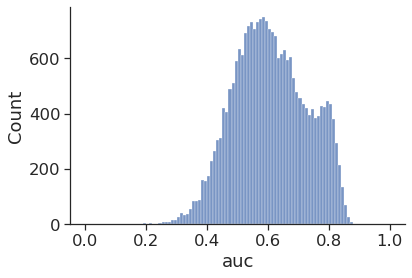

In [229]:
sns.histplot(df_whole_agg[(df_whole_agg['resolution'] == 500)]['auc'],binrange=[0,1], bins=100)

<AxesSubplot:xlabel='auc', ylabel='Count'>

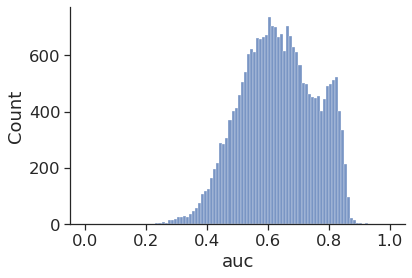

In [228]:
sns.histplot(df_whole_agg[(df_whole_agg['resolution'] == 40)]['auc'],binrange=[0,1], bins=100)

<AxesSubplot:xlabel='auc', ylabel='Count'>

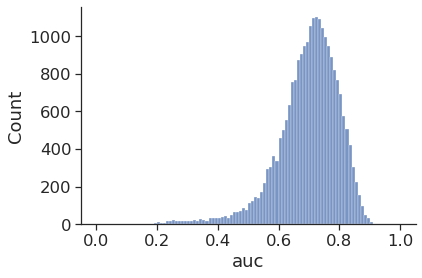

In [224]:
sns.histplot(df_whole_agg[df_whole_agg['resolution'] == 10]['auc'],binrange=[0,1], bins=100)

<AxesSubplot:>

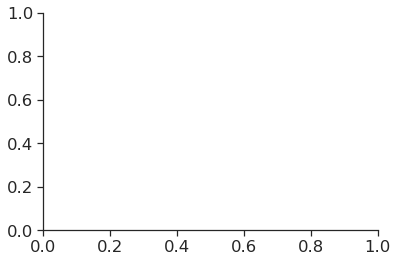

In [145]:
sns.histplot(df_whole_agg[df_whole_agg['resolution'] == 40]['auc'],binrange=[0,1], bins=100, kde=True)

<AxesSubplot:xlabel='auc', ylabel='Count'>

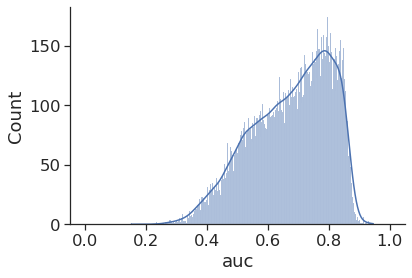

In [147]:
sns.histplot(df_whole_agg[df_whole_agg['resolution'] == 10]['auc'],binrange=[0,1], bins=500, kde=True)

In [91]:
df_whole_agg

gene_id_jac_sim chrom_jac_sim gene_id_exp_file chrom_exp_file  \
0      ENSG00000277342         chr12  ENSG00000277342          chr12   
1      ENSG00000183077         chr17  ENSG00000183077          chr17   
2      ENSG00000251586          chr4  ENSG00000251586           chr4   
3      ENSG00000169635         chr22  ENSG00000169635          chr22   
4      ENSG00000237476         chr22  ENSG00000237476          chr22   
...                ...           ...              ...            ...   
23460  ENSG00000140400         chr15  ENSG00000140400          chr15   
23461  ENSG00000111671         chr12  ENSG00000111671          chr12   
23462  ENSG00000184903          chr7  ENSG00000184903           chr7   
23463  ENSG00000153037          chr5  ENSG00000153037           chr5   
23464  ENSG00000227959          chr1  ENSG00000227959           chr1   

            auc species  resolution                   mapping     coef  \
0      0.735508   human          10  max/pcc/0/all_bins/KR_KR  jac_sim   
1      0.597717   human          10  max/pcc/0/all_bins/KR_KR  jac_sim   
2      0.601297   human          10  max/pcc/0/all_bins/KR_KR  jac_sim   
3      0.656237   human          10  max/pcc/0/all_bins/KR_KR  jac_sim   
4      0.567680   human          10  max/pcc/0/all_bins/KR_KR  jac_sim   
...         ...     ...         ...                       ...      ...   
23460  0.767180   human         500  max/pcc/0/all_bins/KR_KR  jac_sim   
23461  0.827643   human         500  max/pcc/0/all_bins/KR_KR  jac_sim   
23462  0.663467   human         500  max/pcc/0/all_bins/KR_KR  jac_sim   
23463  0.591813   human         500  max/pcc/0/all_bins/KR_KR  jac_sim   
23464  0.744932   human         500  max/pcc/0/all_bins/KR_KR  jac_sim   

       bin_type  percentile KR_type  \
0      all_bins          90      KR   
1      all_bins          90      KR   
2      all_bins          90      KR   
3      all_bins          90      KR   
4      all_bins          90      KR   
...         ...         ...     ...   
23460  all_bins          90      KR   
23461  all_bins          90      KR   
23462  all_bins          90      KR   
23463  all_bins          90      KR   
23464  all_bins          90      KR   

                                                   pairs  coexp_percentile  \
0      inter_only/hic_gene_corr_inter_excluding_intra...                 1   
1      inter_only/hic_gene_corr_inter_excluding_intra...                 1   
2      inter_only/hic_gene_corr_inter_excluding_intra...                 1   
3      inter_only/hic_gene_corr_inter_excluding_intra...                 1   
4      inter_only/hic_gene_corr_inter_excluding_intra...                 1   
...                                                  ...               ...   
23460  inter_only/hic_gene_corr_inter_excluding_intra...                 1   
23461  inter_only/hic_gene_corr_inter_excluding_intra...                 1   
23462  inter_only/hic_gene_corr_inter_excluding_intra...                 1   
23463  inter_only/hic_gene_corr_inter_excluding_intra...                 1   
23464  inter_only/hic_gene_corr_inter_excluding_intra...                 1   

      agg_type proj edge_type  counts_inter  
0         meta  all             96455324722  
1         meta  all             96455324722  
2         meta  all             96455324722  
3         meta  all             96455324722  
4         meta  all             96455324722  
...        ...  ...       ...           ...  
23460    meta2  all             96455324722  
23461    meta2  all             96455324722  
23462    meta2  all             96455324722  
23463    meta2  all             96455324722  
23464    meta2  all             96455324722  

[187720 rows x 18 columns]

In [61]:
df_whole_agg[df_whole_agg['resolution'] == 10]['auc'].mean()

0.6240099254460477

In [62]:
df_whole_agg[df_whole_agg['resolution'] == 100]['auc'].mean()

0.616964619889496

In [48]:
dk[dk['resolution'] == 10]

proj  resolution  agg_type       auc  counts_inter  log_contacts  \
0    DRP005173          10  proj_agg  0.587148      47718444      7.678686   
4    DRP005280          10  proj_agg  0.503527     776930964      8.890382   
8    ERP104251          10  proj_agg  0.569632     305495902      8.485005   
12   ERP107279          10  proj_agg  0.483469    1260196942      9.100438   
16   ERP118600          10  proj_agg  0.580112     135309876      8.131329   
..         ...         ...       ...       ...           ...           ...   
464  SRP271101          10  proj_agg  0.509211     462355800      8.664976   
468  SRP272124          10  proj_agg  0.587551      24488520      7.388963   
472  SRP274139          10  proj_agg  0.570118     134998720      8.130330   
0          all          10      meta  0.624010   96455324722     10.984326   
1          all          10     meta2  0.624010   96455324722     10.984326   

       project  runs experiment type  \
0    DRP005173   9.0               o   
4    DRP005280   3.0            Hi-C   
8    ERP104251   4.0            Hi-C   
12   ERP107279  12.0               o   
16   ERP118600   3.0            Hi-C   
..         ...   ...             ...   
464  SRP271101   5.0            Hi-C   
468  SRP272124   1.0               o   
472  SRP274139   3.0            Hi-C   
0          NaN   NaN               o   
1          NaN   NaN               o   

                                   experiment type2  \
0    "inexpensive and controllable Hi-C (iconHi-C)"   
4                                              Hi-C   
8                                           in Hi-C   
12                     Hi-C , promoter capture Hi-C   
16                                             Hi-C   
..                                              ...   
464                                            Hi-C   
468                                          HiChIP   
472                                            Hi-C   
0                                               NaN   
1                                               NaN   

                                              SRA link  \
0                                                  NaN   
4     https://www.ncbi.nlm.nih.gov/sra/DRX210389[accn]   
8    https://www.ncbi.nlm.nih.gov/sra/ERX2719150[accn]   
12                                                 NaN   
16   https://www.ncbi.nlm.nih.gov/sra/ERX3670301[accn]   
..                                                 ...   
464  https://www.ncbi.nlm.nih.gov/sra/SRX8699726[accn]   
468   https://www.ncbi.nlm.nih.gov/sra/?term=SRP272124   
472  https://www.ncbi.nlm.nih.gov/sra/SRX8844378[accn]   
0                                                  NaN   
1                                                  NaN   

                                           Paper title  \
0    Multifaceted Hi-C benchmarking for chromosome-...   
4                                      FANTOM6 project   
8     Eight in situ Hi-C experiments of mouse OG2 s...   
12   Promoter capture and whole genome in situ Hi-C...   
16   The chromosomal architecture of acute myelocyt...   
..                                                 ...   
464  Synergistic alterations in multilevel chromati...   
468  Super-Enhancer-Associated Aortic Valve Stenosi...   
472  STAG2 loss-of-function affects short-range gen...   
0                                                  NaN   
1                                                  NaN   

                                            Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0    This study provides the first comparison of mu...        NaN        NaN   
4    This project aims to systematically elucidate ...        NaN        NaN   
8    In this experiment, we've examined chromatin c...        NaN        NaN   
12                                                 NaN        NaN        NaN   
16   2×10^7 HL60 cells were treated with 10 uM ATRA...        NaN        NaN   
..                                                 ...   

In [30]:
dk[dk['resolution'] == 500].groupby(['experiment type2'])['auc'].count()

experiment type2
"inexpensive and controllable Hi-C (iconHi-C)"            1
Capture Hi-C                                              2
Chia-PET                                                  1
Hi-C                                                     66
Hi-C                                                      2
Hi-C , This project has a separate srx for chia -pet      1
Hi-C , capture 4Tran                                      1
Hi-C , promoter capture Hi-C                              1
Hi-C 2.0                                                  1
Hi-C ?                                                   12
Hi-C CHi-C                                                1
Hi-C and HiChip                                           1
Hi-C, Chia-PET, 4C                                        1
Hi-C, capture Hi-C                                        2
Hi-C, promoter capture Hi-C                               1
Hi-CoP                                                    1
HiC                    

In [35]:
dk[dk['resolution'] == 10].sort_values(by=['auc'])

proj  resolution  agg_type       auc  counts_inter  log_contacts  \
40   SRP076397          10  proj_agg  0.412350        152670      5.183754   
324  SRP182670          10  proj_agg  0.445636         86434      4.936685   
152  SRP118999          10  proj_agg  0.455742    4477597526      9.651045   
360  SRP199098          10  proj_agg  0.459101    3558738228      9.551296   
416  SRP234115          10  proj_agg  0.459230    3282665126      9.516227   
..         ...         ...       ...       ...           ...           ...   
292  SRP163908          10  proj_agg  0.606896      22913770      7.360097   
448  SRP261299          10  proj_agg  0.607345      62605354      7.796611   
180  SRP132233          10  proj_agg  0.615266      97224642      7.987776   
48   SRP090318          10  proj_agg  0.630192      48112318      7.682256   
0          all          10      meta  0.633687   96455324722     10.984326   

       project   runs experiment type experiment type2  \
40   SRP076397    2.0            Hi-C           Hi-C ?   
324  SRP182670    1.0               o     NG Capture-C   
152  SRP118999  501.0            Hi-C             Hi-C   
360  SRP199098    8.0            Hi-C             Hi-C   
416  SRP234115   29.0            Hi-C             Hi-C   
..         ...    ...             ...              ...   
292  SRP163908    2.0            Hi-C           Hi-C ?   
448  SRP261299    2.0            Hi-C           Hi-C ?   
180  SRP132233    1.0            Hi-C             Hi-C   
48   SRP090318    4.0               o     Trac-looping   
0          NaN    NaN               o              NaN   

                                              SRA link  \
40   https://www.ncbi.nlm.nih.gov/sra/SRX8330235[accn]   
324  https://www.ncbi.nlm.nih.gov/sra/SRX5299882[accn]   
152  https://www.ncbi.nlm.nih.gov/sra/SRX3276176[accn]   
360  https://www.ncbi.nlm.nih.gov/sra/SRX7820846[accn]   
416  https://www.ncbi.nlm.nih.gov/sra/SRX7248180[accn]   
..                                                 ...   
292  https://www.ncbi.nlm.nih.gov/sra/SRX8330504[accn]   
448  https://www.ncbi.nlm.nih.gov/sra/SRX8330828[accn]   
180   https://www.ncbi.nlm.nih.gov/sra/?term=SRP132233   
48   https://www.ncbi.nlm.nih.gov/sra/SRX3183023[accn]   
0                                                  NaN   

                                           Paper title  \
40   Homo sapiens whole genome sequencing of Ceph/U...   
324   Characterization of human erythroid chromatin...   
152        Cohesin loss eliminates all loop domains \n   
360  Combined Cohesin-Runx1 Deficiency Synergistica...   
416  CTCF is dispensable for immune cell transdiffe...   
..                                                 ...   
292  Homo sapiens isolate:HG03807 Genome sequencing...   
448  Homo sapiens isolate:HG02106 Genome sequencing...   
180  Integrating Hi-C links with assembly graphs fo...   
48   Trac-looping measures genome structure and chr...   
0                                                  NaN   

                                            Unnamed: 6      Unnamed: 7  \
40   This project contains the sequence of NA12878,...             NaN   
324  A two-phase liquid differentiation of peripher...             NaN   
152  The human genome folds to create thousands of ...  Rao et al 2017   
360  STAG2 encodes a cohesin component and is frequ...             NaN   
416  Studies of genome topology, chromatin state an...             NaN   
..                                                 ...             ...   
292  This project contains the sequence of HG03807....             NaN   
448  This contains the sequence of HG00513. Sequenc...             NaN   
180  Long-read sequencing and novel long-range assa...             NaN   
48   Interaction between different chromatin region...             NaN   
0                                                  NaN             NaN   

    Unnamed: 8 species  
40         NaN   human  
324        NaN   human  
152        NaN   h

resolution
1      0.600574
2      0.596474
3      0.599743
4      0.600097
5      0.602780
         ...   
114    0.610925
115    0.611014
116    0.611087
117    0.611300
118    0.611370
Name: auc, Length: 118, dtype: float64


<ipython-input-220-dbb89264a235>:88: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()
<ipython-input-220-dbb89264a235>:101: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


[]

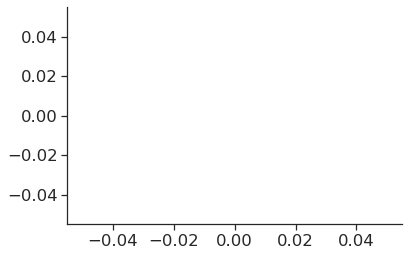

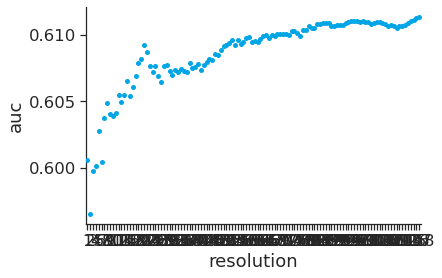

In [220]:
    species_list = ['human']
    if species_list == ['human']:
        color_1 = '#98DBF6'
        color_2 = '#00A5E6'
    elif species_list == ['mouse']:
        color_1 = '#F69398'
        color_2 = '#E83B43'
    else:
        color_1 = '#E9DBC4'
        color_2 = '#EC9200'        
    
    res_list = [500]
    #res_list = [500]
    #KR_type_list = ['KR_ranked_KR']
    KR_type_list = ['KR']
    #performance_type_list = ['all']
    edge_type_list = ['contact']
    #performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv']
    performance_type_list = ['inter_only/hic_gene_corr_inter_excluding_intra_nanranked_ind_29_0_1_percent_per_chr.csv']
    
    #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
    #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
    #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

    df_list = []
    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
        df_seq_depth['species'] = species
        df_list.append(df_seq_depth)

    #whole aggreagte
    import pandas as pd
    empty_list = []

    for species in species_list: 
    #for species in ['human']: 
      #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
      for bin_type in ['all_bins']: 
        for resolution in res_list:
            for coef in ['jac_sim']:
            #for coef in ['pcc', 'jac_sim']:
              #for mapping in ['tss']:
              for mapping in ['max/spr/0/all_bins/KR_KR']:
                #for percentile in [90]:
                for percentile in [90]:
                    for gene_percentile in [1]:
                    #for gene_percentile in [10]:

                        for KR_type in KR_type_list:
                            for performance_type_int in range(0,120):
                                performance_type = f'inter_only/hic_gene_corr_inter_excluding_intra_nanranked_ind_{performance_type_int}_0_1_percent_per_chr.csv'
                                
                                

                                file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                file_name = f'{resolution}kbp_raw/{mapping}/{performance_type}'

                                try:


                                    df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                    df2['species'] = species
                                    df2['resolution'] = performance_type_int
                                    df2['mapping'] = mapping
                                    df2['coef'] = coef
                                    df2['bin_type'] = bin_type
                                    df2['percentile'] = percentile
                                    df2['KR_type'] = KR_type
                                    df2['pairs'] = performance_type
                                    df2['coexp_percentile'] = gene_percentile
                                    df2['agg_type'] = 'meta'
                                    df2['proj'] = 'all'
                                    df2['edge_type'] = ''
                                    empty_list.append(df2)
                                except:
                                    continue
    df_whole_agg=pd.concat(empty_list)       
    df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
    print (df_whole_agg.groupby(['resolution'])['auc'].mean())
    
    

    df_ind=pd.concat(empty_list)

    df = pd.concat([df_whole_agg, df_ind])

    dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

    for species in species_list: 
        df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
        df_seq_depth['species'] = species
        df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
        df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
        #dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

    import numpy as np
    dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

    dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
    dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
    dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

    dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

    #sc_bar = sns.scatterplot(data=dk[dk['resolution']==500], x='log_contacts', y='auc', style='agg_type', color=color_1,edgecolor="black", s=100, linewidth=1.2, markers =  {"proj_agg": "*", "meta": "o"})
    #sc_bar.legend().remove()
    #sc_bar.set(ylim=(0.5, 0.67))
    plt.plot()
    #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_inter.pdf',
    #        transparent=True)
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)
    #axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v")
    for i, patch in enumerate(axb.artists):
        # Boxes from left to right

        patch.set_hatch('//')
    sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=5, color=color_2, orient="v")
    #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
    #ax.set(ylim=(0.5, 0.67))
    plt.plot()
    
    #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_inter.pdf',
    #        transparent=True)


/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//500kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
resolution
500    0.557017
Name: auc, dtype: float64
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//500kbp_raw/max/inter_only/hic_gene_KR_inter_1_percent_per_chr.csv
resolution
500    0.612327
Name: auc, dtype: float64
SRP105082 500 1 SRP105082
SRP012412 500 2 SRP012412
SRP118999 500 3 SRP118999
SRP050102 500 4 SRP050102
SRP117084 500 5 SRP117084
SRP152979 500 6 SRP152979
SRP115572 500 7 SRP115572
SRP216194 500 8 SRP216194
SRP108500 500 9 SRP108500
SRP212226 500 10 SRP212226
SRP131871 500 11 SRP131871
SRP218691 500 12 SRP218691
SRP149906 500 13 SRP149906
SRP094854 500 14 SRP094854
SRP221518 500 15 SRP221518
SRP141473 500 16 SRP141473
SRP267107 500 17 SRP267107
SRP234897 500 18 SRP234897
SRP154953 500 19 SRP154953
SRP133031 500 20 SRP133031
SRP234115 500 21 SRP234115
SRP152879 500 22 SRP152879
SRP115913 

ValueError: No objects to concatenate

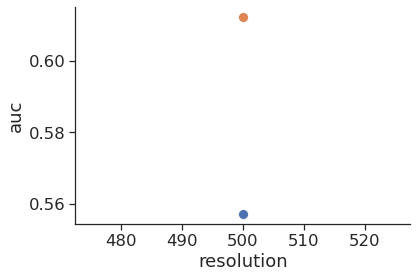

In [251]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [500]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/compartment/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())

        performance_type_list = ['inter_only/hic_gene_KR_inter_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/max/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())

        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['inter_only/hic_gene_none_inter_1_percent_per_chr.csv']:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/compartment/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            #print (f'{file_path}/{file_name}')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==500], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//25kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//40kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//100kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//250kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//500kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr.csv
resolution
10     0.526727
25     0.527725
40     0.527625
100    0.550526
250    0.520674
500    0.514277
Name: auc, dty

<ipython-input-196-7677605ae625>:157: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()


None


<ipython-input-196-7677605ae625>:170: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


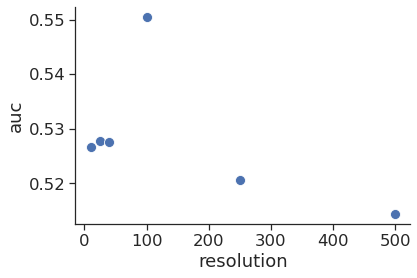

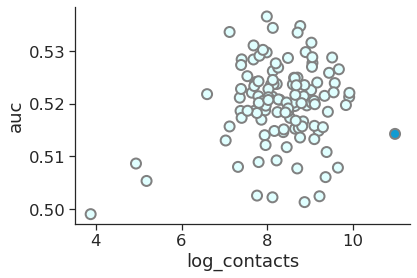

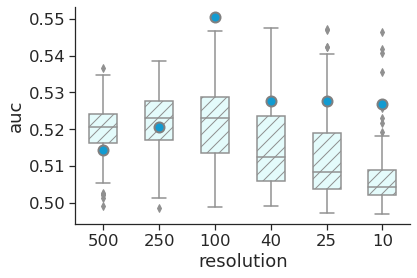

In [196]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [10, 25,40, 100, 250, 500]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/compartment/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())

        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['inter_only/hic_gene_none_inter_1_percent_per_chr.csv']:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/compartment/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            #print (f'{file_path}/{file_name}')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==500], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//10kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//25kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//40kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//100kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//250kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_human/aggregates//500kbp_raw/compartment/inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv
resolution
10     0.524234
25     0.543593
40     0.553236
10

<ipython-input-195-5b2c32dbb028>:157: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()


None


<ipython-input-195-5b2c32dbb028>:170: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])


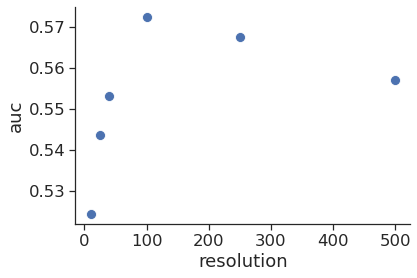

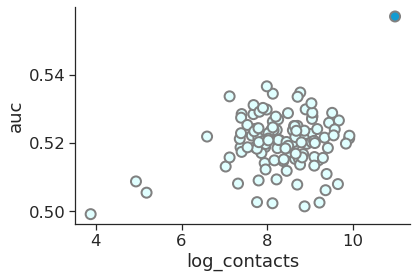

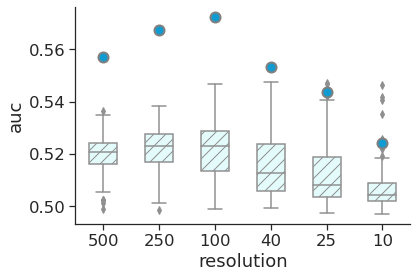

In [195]:
    #for species_list in [['human'], ['mouse'] ]:
    for species_list in [['human']]:
    #for species_list in [['human']]:
        intra_inter_type='inter'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val=0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200' 
            max_val=0.59

        #res_list = [10, 25, 40, 100, 250, 500]
        res_list = [10, 25,40, 100, 250, 500]
        reversed_list = res_list[::-1]
        #res_list = [1]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr_aggregate.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_inter.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/compartment/{performance_type}'
                                    print (f'{file_path}/{file_name}')

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
  
        df_whole_agg=pd.concat(empty_list)       
        df_whole_agg['counts_inter'] = df_seq_depth['counts_inter'].sum()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())

        performance_type_list = ['inter_only/hic_gene_intra_1_percent_per_chr.csv']


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['inter_only/hic_gene_none_inter_1_percent_per_chr.csv']:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/compartment/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            #print (f'{file_path}/{file_name}')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_inter'] = df_seq_depth_subset['counts_inter'].sum()


                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]
            dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_inter']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_inter'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_inter']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]
        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_trans.tsv'))
        #plt.plot()
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==500], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #sc_bar.set(ylim=(0.48, max_val))
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5,  order=reversed_list)
        for i, patch in enumerate(axb.artists):
        # Boxes from left to right

            patch.set_hatch('//')
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), (dk['auc'].max()+.025)))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()
 
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


0.6003038077729104
resolution
10     0.578355
25     0.592176
40     0.599457
100    0.615386
250    0.614343
500    0.602107
Name: auc, dtype: float64


<ipython-input-194-54f7b2f48c0c>:161: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()
<ipython-input-194-54f7b2f48c0c>:173: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])


None
0.6153855386357255


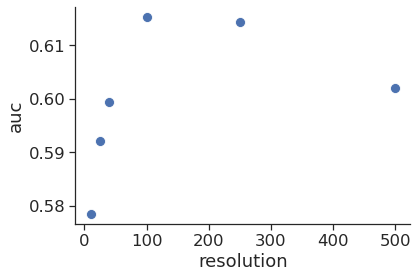

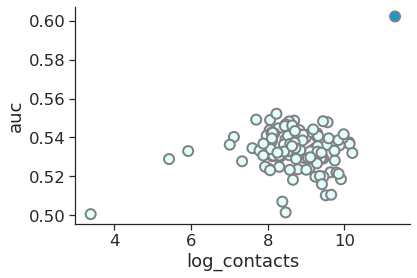

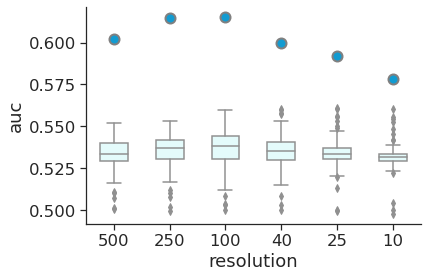

In [194]:
    #for species_list in [ ['human'], ['mouse'], ['drosophila']]:
    for species_list in [['human']]:
        intra_inter_type='intra'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val = 0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200'
            max_val=0.59

        #res_list = [1, 5, 10, 25, 40, 100, 250, 500]
        #res_list = [1, 5, 10]
        res_list = [10, 25, 40, 100, 250, 500]
        reversed_list = res_list[::-1]
        #res_list = [10]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['intra_only/hic_gene_intra_1_percent_per_chr_aggregate.csv']
        #performance_type_list = ['pcc/0/all_bins/KR_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/compartment/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
        df_whole_agg=pd.concat(empty_list)    
        print (df_whole_agg['auc'].mean())
        df_whole_agg['counts_intra'] = df_seq_depth['counts_intra'].sum()
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())
        #sns.boxplot(data=df_whole_agg, y='auc')
        #plt.plot()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)


        performance_type_list = ['intra_only/hic_gene_intra_1_percent_per_chr.csv']
        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    #performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/compartment/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_intra'] = df_seq_depth_subset['counts_intra'].sum()
                                            #print (df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index())
                                            #df2 = df2.merge(df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])
                                            #print (jkkk)
                                            #print (df2)

                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_intra']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_intra']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_cis.tsv'))
        #plt.plot()
        
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==500], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        #sc_bar.set(ylim=(0.48, max_val))
        print (dk['auc'].max())
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5, order=reversed_list)
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()

        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


0.6003038077729104
resolution
10     0.578355
25     0.592176
40     0.599457
100    0.615386
250    0.614343
500    0.602107
Name: auc, dtype: float64


<ipython-input-193-f048083b466a>:162: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()
<ipython-input-193-f048083b466a>:174: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])


None
0.6153855386357255


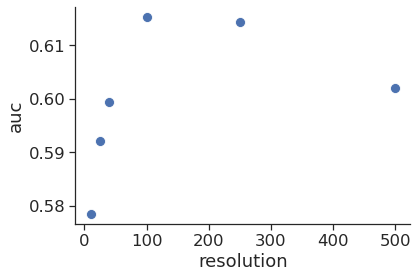

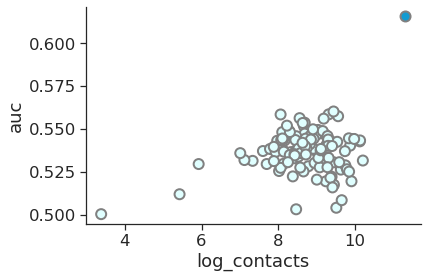

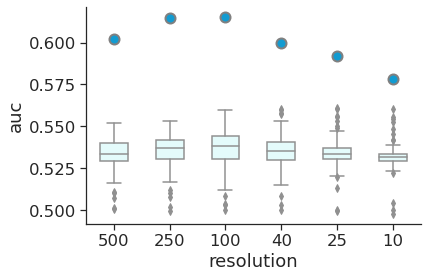

In [193]:
    #for species_list in [ ['human'], ['mouse'], ['drosophila']]:
    for species_list in [['human']]:
        intra_inter_type='intra'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val = 0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200'
            max_val=0.59

        #res_list = [1, 5, 10, 25, 40, 100, 250, 500]
        #res_list = [1, 5, 10]
        res_list = [10, 25, 40, 100, 250, 500]
        reversed_list = res_list[::-1]
        #res_list = [10]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['intra_only/hic_gene_intra_1_percent_per_chr_aggregate.csv']
        #performance_type_list = ['pcc/0/all_bins/KR_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/compartment/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
        df_whole_agg=pd.concat(empty_list)    
        print (df_whole_agg['auc'].mean())
        df_whole_agg['counts_intra'] = df_seq_depth['counts_intra'].sum()
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())
        #sns.boxplot(data=df_whole_agg, y='auc')
        #plt.plot()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        
        performance_type_list = ['intra_only/hic_gene_intra_1_percent_per_chr.csv']


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    #performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/compartment/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_intra'] = df_seq_depth_subset['counts_intra'].sum()
                                            #print (df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index())
                                            #df2 = df2.merge(df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])
                                            #print (jkkk)
                                            #print (df2)

                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_intra']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_intra']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_cis.tsv'))
        #plt.plot()
        
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==100], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        #sc_bar.set(ylim=(0.48, max_val))
        print (dk['auc'].max())
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5, order=reversed_list)
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()

        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()


0.5397882001286266
resolution
10     0.541833
25     0.542977
40     0.543170
100    0.541370
250    0.537464
500    0.531915
Name: auc, dtype: float64


<ipython-input-197-351bd8b9a542>:162: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()
<ipython-input-197-351bd8b9a542>:174: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])


None
0.5609833904375564


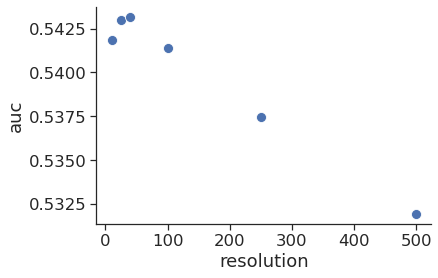

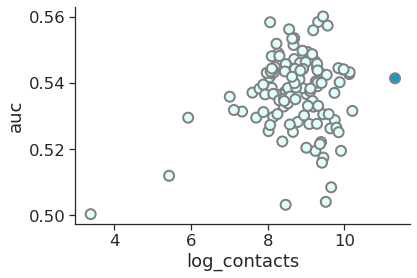

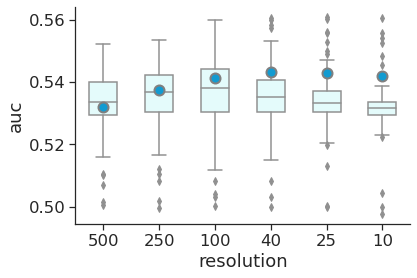

In [197]:
    #for species_list in [ ['human'], ['mouse'], ['drosophila']]:
    for species_list in [['human']]:
        intra_inter_type='intra'
        if species_list == ['human']:
            color_1 = 'lightcyan'
            color_2 = '#129BD1'
            max_val = 0.67
        elif species_list == ['mouse']:
            color_1 = 'mistyrose'
            color_2 = '#E83B43'
            max_val=0.64
        else:
            color_1 = 'antiquewhite'
            color_2 = '#EC9200'
            max_val=0.59

        #res_list = [1, 5, 10, 25, 40, 100, 250, 500]
        #res_list = [1, 5, 10]
        res_list = [10, 25, 40, 100, 250, 500]
        reversed_list = res_list[::-1]
        #res_list = [10]
        #KR_type_list = ['KR_ranked_KR']
        KR_type_list = ['KR_ranked']
        #performance_type_list = ['all']
        edge_type_list = ['contact']
        performance_type_list = ['intra_only/hic_gene_intra_1_percent_per_chr.csv']
        #performance_type_list = ['pcc/0/all_bins/KR_KR/all/hic_gene_corr_gw_1_percent_per_chr.csv']

        #f_name = 'hic_gene_corr_inter_1_percent_per_chr.csv'
        #f_name = 'hic_gene_KR_intra_1_percent_per_chr.csv'
        #f_name = 'hic_gene_corr_gw_1_percent_per_chr.csv'

        df_list = []
        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_exclude_count_intra.txt', sep='\t')
            df_seq_depth['species'] = species
            df_list.append(df_seq_depth)

        #whole aggreagte
        import pandas as pd
        empty_list = []

        for species in species_list: 
        #for species in ['human']: 
          #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
          for bin_type in ['all_bins']: 
            for resolution in res_list:
                for coef in ['jac_sim']:
                #for coef in ['pcc', 'jac_sim']:
                  #for mapping in ['tss']:
                  for mapping in ['max']:
                    #for percentile in [90]:
                    for percentile in [90]:
                        for gene_percentile in [1]:
                        #for gene_percentile in [10]:

                            for KR_type in KR_type_list:
                                for performance_type in performance_type_list:
                                    #performance_type = 'intra_only/hic_gene_KR_intra_1_percent_per_chr.csv'

                                    file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/aggregates/'

                                    file_name = f'{resolution}kbp_raw/compartment/{performance_type}'

                                    try:


                                        df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                        df2['species'] = species
                                        df2['resolution'] = resolution
                                        df2['mapping'] = mapping
                                        df2['coef'] = coef
                                        df2['bin_type'] = bin_type
                                        df2['percentile'] = percentile
                                        df2['KR_type'] = KR_type
                                        df2['pairs'] = performance_type
                                        df2['coexp_percentile'] = gene_percentile
                                        df2['agg_type'] = 'meta'
                                        df2['proj'] = 'all'
                                        df2['edge_type'] = ''
                                        #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                        empty_list.append(df2)
                                    except:
                                        continue
        df_whole_agg=pd.concat(empty_list)    
        print (df_whole_agg['auc'].mean())
        df_whole_agg['counts_intra'] = df_seq_depth['counts_intra'].sum()
        print (df_whole_agg.groupby(['resolution'])['auc'].mean())
        #sns.boxplot(data=df_whole_agg, y='auc')
        #plt.plot()
        tmp_dff = df_whole_agg.groupby(['resolution'])['auc'].mean().reset_index()
        sns.scatterplot(data=tmp_dff, x='resolution', y='auc', s=100)
        
        performance_type_list = ['intra_only/hic_gene_intra_1_percent_per_chr.csv']


        for species in species_list: 
            contacts_path = f'/sonas-hs/gillis/hpc/data/nfox/hi_c_data_processing/data_{species}/stats/'
            df_con = pd.read_csv(f'{contacts_path}/project_network_counts.txt', sep=' ', names=['id', 'count'])

            import pandas as pd
            empty_list = []
            counter = 0

            for proj in df_con['id'].tolist():
                  
                  counter = counter +1

                  #for species in ['drosophila', 'drosophila', 'drosophila']: 

                  #for bin_type in ['gene_bins', 'all_bins', 'non_gene']: 
                  for bin_type in ['all_bins']: 
                    for resolution in res_list:
                        for coef in ['jac_sim']:
                        #for coef in ['pcc', 'jac_sim']:
                          #for mapping in ['tss']:
                          for mapping in ['max']:
                            for percentile in ['90']:
                                for KR_type in KR_type_list:
                                    #performance_type_list = ['intra_only/hic_gene_KR_intra_1_percent_per_chr.csv']
                                    for performance_type in performance_type_list:
                                    #for performance_type in ['intra_only', 'inter_only', 'all']:
                                        file_path = f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/{proj}/'
                                        file_name = f'{resolution}kbp_raw/compartment/{performance_type}'


                                        #file_name = f'{resolution}kbp_raw/{mapping}/{coef}/{percentile}/{bin_type}/{KR_type}/{performance_type}/{f_name}'

                                        try:

                                            df2 = pd.read_csv(f'{file_path}/{file_name}', sep='\t')
                                            df2['species'] = species
                                            df2['resolution'] = resolution
                                            #df2['inp_file'] = inp_file
                                            df2['mapping'] = mapping
                                            df2['coef'] = coef
                                            df2['bin_type'] = bin_type
                                            df2['percentile'] = percentile
                                            df2['KR_type'] = KR_type
                                            df2['proj'] = proj
                                            df2['pairs'] = performance_type
                                            df2['agg_type'] = 'proj_agg'
                                            #df2 = df2[df2['chrom_exp_file'].isin(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6'])]
                                            #print (proj)
                                            df_seq_depth_subset = df_seq_depth[df_seq_depth['proj_id'].isin([proj])]
                                            df2['counts_intra'] = df_seq_depth_subset['counts_intra'].sum()
                                            #print (df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index())
                                            #df2 = df2.merge(df_seq_depth_subset.groupby(['chrom'])['counts_intra'].sum().reset_index(), right_on=['chrom'], left_on=['chrom_jac_sim'])
                                            #print (jkkk)
                                            #print (df2)

                                        except:
                                            print (proj, resolution, counter, proj)
                                            continue


                                        empty_list.append(df2)
        df_ind=pd.concat(empty_list)

        df = pd.concat([df_whole_agg, df_ind])

        dt = df.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()

        for species in species_list: 
            df_seq_depth = pd.read_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details.tsv', sep='\t')
            df_seq_depth['species'] = species
            df_seq_depth['project'] = [x.strip() for x in df_seq_depth['project']]
            df_seq_depth['experiment type'] = [x.strip() for x in df_seq_depth['experiment type']]

        import numpy as np
        dt['log_contacts'] = [np.log10(x) for x in dt['counts_intra']]

        dt = dt.merge(df_seq_depth, left_on='proj', right_on='project')
        dk = pd.concat([dt, df_whole_agg.groupby(['proj', 'resolution', 'agg_type'])['auc', 'counts_intra'].mean().reset_index()])
        dk['log_contacts'] = [np.log10(x) for x in dk['counts_intra']]

        dk['experiment type'] = [x if x=='Hi-C' else 'o' for x in dk['experiment type']]

        print (dk.to_csv(f'/sonas-hs/gillis/hpc/data/lohia/hi_c_data_processing/data_{species}/stats/{species}_project_network_details_{resolution}_auc_cis.tsv'))
        #plt.plot()
        
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()

        sc_bar = sns.scatterplot(data=dk[dk['resolution']==100], x='log_contacts', y='auc', style='agg_type', hue='agg_type', palette=[color_1, color_2],edgecolor="grey", s=100, linewidth=2, markers =  {"proj_agg": "o", "meta": "o"})
        sc_bar.legend().remove()
        #sc_bar.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        #sc_bar.set(ylim=(0.48, max_val))
        print (dk['auc'].max())
        plt.plot()
        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots()
        #sns.scatterplot(x='resolution', y='auc', data=dt[dt['agg_type']=='all'], ax=ax)

        #axb = sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, edgecolor='black', linewidth=0.4, size=2)
        axb = sns.boxplot(x='resolution', y='auc', data=dk[dk['agg_type']=='proj_agg'], ax=ax, color=color_1, orient="v", dodge=True, width=0.5, order=reversed_list)
        #for i, patch in enumerate(axb.artists):
            # Boxes from left to right

        #    patch.set_hatch('//')
        #sns.scatterplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=100, color=color_2, markers='^')
        sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, size=10, color=color_2, edgecolor='grey', linewidth=2,marker='o', order=reversed_list)
        #sns.swarmplot(x='resolution', y='auc', data=dk[dk['agg_type']=='meta'], ax=ax, color=color_2, orient="v", dodge=True, linewidth=1, edgecolor='black', size=8, markers='*')
        #sns.lineplot(y='resolution', x='auc', data=dt[dt['agg_type']=='all'], ax=ax, color="green")
        #ax.set(ylim=(dk['auc'].min(), dk['auc'].max()))
        #ax.set(ylim=(0.48, max_val))
        plt.plot()

        #plt.savefig(f'/grid/gillis/data/lohia/hi_c_data_processing/notebooks/figures/{species_list}_ind_vs_agg_all_resol_{intra_inter_type}.pdf',
        #        transparent=True, bbox_inches='tight')
        #plt.close()
